In [1]:
import sqlalchemy
import pandas as pd
from components.charts import heatmap_chart

In [2]:
engine = sqlalchemy.create_engine('sqlite:///stock_etf.db')

In [3]:
data = pd.read_sql_query(
    "SELECT * FROM stockData", engine, parse_dates="Date")

In [4]:
portfolio_ratios = pd.DataFrame({
    'AGRO/ADEA': (data["AGRO"]/data["ADEA"]),
    'UNM/TSEM': (data["UNM"]/data["TSEM"]),
    'A/FSLR': (data["A"]/data["FSLR"]),
    'ACN/ICLR': (data["ACN"]/data["ICLR"]),
    'AFL/HSIC': (data["AFL"]/data["HSIC"]),
    'APO/CELH': (data["APO"]/data["CELH"]),
    'CCJ/AGIO': (data["CCJ"]/data["AGIO"]),
    'DHI/SRPT': (data["DHI"]/data["SRPT"]),
    'OSK/DVA': (data["OSK"]/data["DVA"]),
})

In [5]:
portfolio_C_C_returns = ((portfolio_ratios - portfolio_ratios.shift(1)) / portfolio_ratios.shift(1))*100

In [6]:
def DOR (pairs): 
    pair_list = pairs.split()
    descriptive_statistics = pd.DataFrame()
    for pair in pair_list:
    
        pair_statistics = pd.DataFrame({
        pair: {'Mean' : portfolio_C_C_returns[pair].mean(),
            'Variance' : portfolio_C_C_returns[pair].var(),
            'Std' : portfolio_C_C_returns[pair].std(),
            'Skew' : portfolio_C_C_returns[pair].skew(),
            'Kurtosis' : portfolio_C_C_returns[pair].kurtosis(),
            'Min' : portfolio_C_C_returns[pair].min(),
            'Max' : portfolio_C_C_returns[pair].max()},
        })
        
        descriptive_statistics = pd.concat([descriptive_statistics, pair_statistics], axis=1)
        
    return descriptive_statistics

In [7]:
corr_check = portfolio_ratios.corr(method='spearman').round(2)

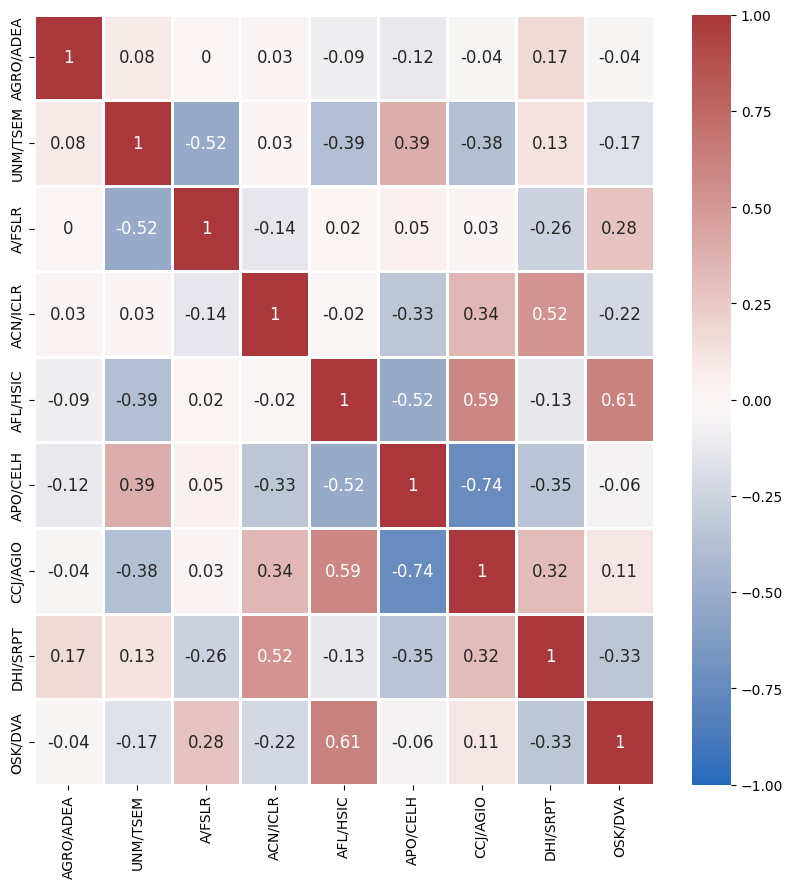

In [8]:
heatmap_chart(corr_check)

In [10]:
corr_check.to_csv('corr_check.csv', index=True)

In [11]:
variance = portfolio_ratios.var()

In [12]:
variance

AGRO/ADEA      0.057895
UNM/TSEM       0.197780
A/FSLR         0.150082
ACN/ICLR       0.012522
AFL/HSIC       0.033125
APO/CELH     128.792049
CCJ/AGIO       0.222973
DHI/SRPT       0.174404
OSK/DVA        0.060727
dtype: float64